         DATE  Price_NZ    NZ_BTU  NZ_USD_Q  NZBTU_USD        HH
41 2009-06-01  7.067294  7.456390  0.626667   4.672671  3.670000
42 2009-09-01  6.931729  7.313362  0.705367   5.158602  3.380000
43 2009-12-01  6.880381  7.259187  0.724933   5.262427  4.946667
44 2010-03-01  7.198392  7.594707  0.704300   5.348952  4.546667
45 2010-06-01  6.402182  6.754661  0.701033   4.735242  4.523333
46 2010-09-01  7.423850  7.832577  0.730467   5.721436  3.880000
47 2010-12-01  7.609725  8.028686  0.762800   6.124282  4.150000
48 2011-03-01  7.300203  7.702123  0.763000   5.876720  4.100000
49 2011-06-01  7.201765  7.598266  0.818767   6.221207  4.423333
50 2011-09-01  7.321425  7.724513  0.813533   6.284149  3.843333
51 2011-12-01  6.270751  6.615994  0.781067   5.167532  3.026667
52 2012-03-01  6.584252  6.946755  0.824700   5.728989  2.210000
53 2012-06-01  6.787404  7.161091  0.784833   5.620263  2.613333
54 2012-09-01  6.727379  7.097762  0.815667   5.789407  3.003333
55 2012-12-01  6.216690  

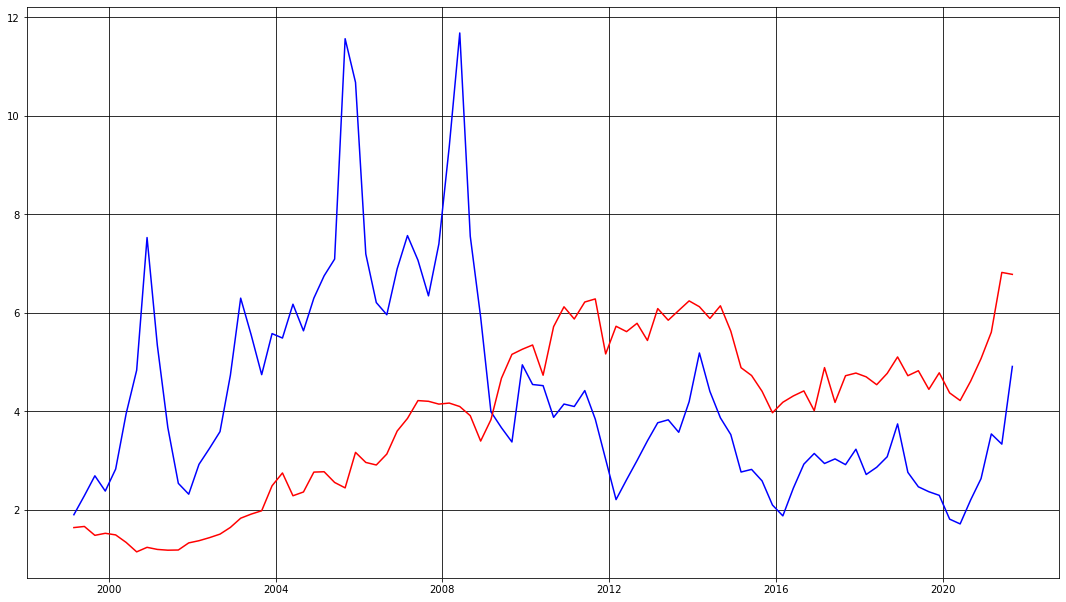

In [17]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df2 = df[(df['DATE'] > '2009-3-1') & (df['DATE'] <= '2020-6-10')]
print(df2)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df['DATE'],df['HH'],color='blue')
plt.plot(df['DATE'],df['NZBTU_USD'],color='red')
plt.grid(color="black")

                            OLS Regression Results                            
Dep. Variable:                     HH   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.421
Date:                Tue, 01 Feb 2022   Prob (F-statistic):             0.0677
Time:                        11:44:33   Log-Likelihood:                -195.11
No. Observations:                  91   AIC:                             394.2
Df Residuals:                      89   BIC:                             399.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3246      0.574      9.277      0.0

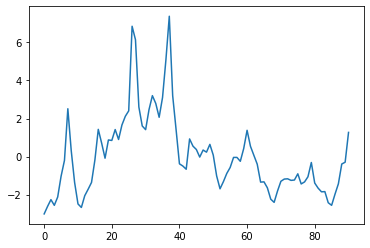

In [20]:
result = smf.ols(formula="HH ~ NZBTU_USD", data=df).fit()
print(result.summary())
plt.plot(result.resid)

test = ts.adfuller(result.resid,autolag="AIC")
print(test)

result = ts.coint(df['HH'],df['NZBTU_USD'])
print(result)

(-1.8623935942983894, 0.3499537840831108, 1, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, 45.68821695244358)
(-1.8642336511304085, 0.3490691770502399, 4, 40, {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}, 27.439676416215754)


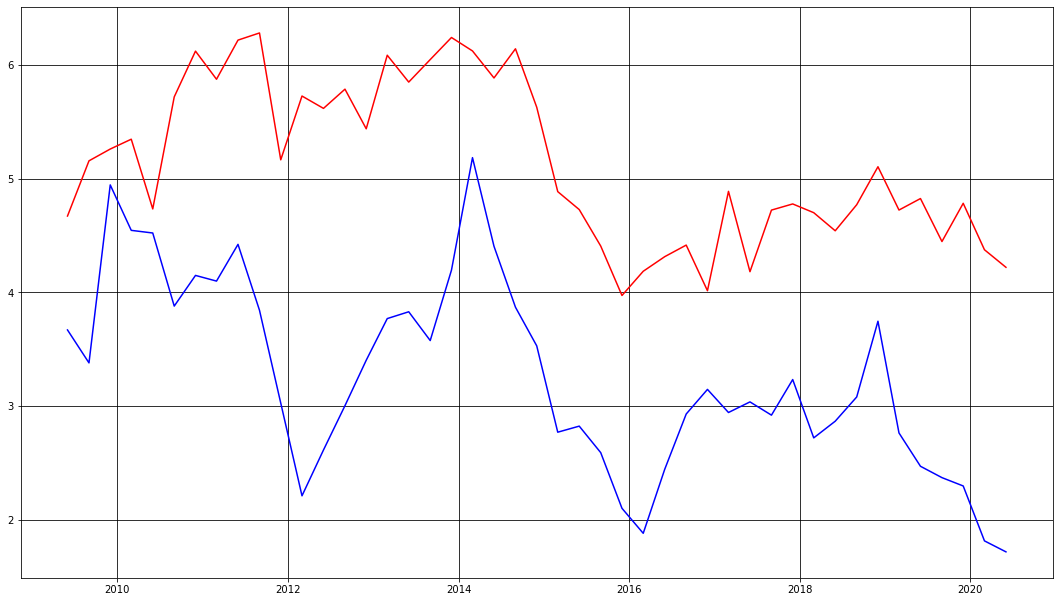

In [16]:
test1 = ts.adfuller(df2['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df2['NZBTU_USD'],autolag="AIC")
print(test2)




fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df2['DATE'],df2['HH'],color='blue')
plt.plot(df2['DATE'],df2['NZBTU_USD'],color='red')
plt.grid(color="black")



                            OLS Regression Results                            
Dep. Variable:              NZBTU_USD   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     35.19
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.59e-07
Time:                        09:59:11   Log-Likelihood:                -34.162
No. Observations:                  45   AIC:                             72.32
Df Residuals:                      43   BIC:                             75.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3153      0.317     10.453      0.0

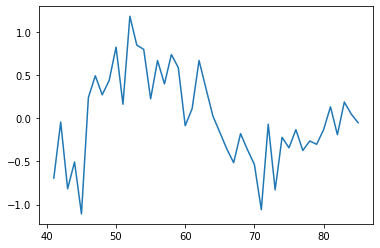

In [15]:
result = smf.ols(formula="NZBTU_USD ~ HH", data=df2).fit()
print(result.summary())
plt.plot(result.resid)

test = ts.adfuller(result.resid,autolag="AIC")
print(test)

result = ts.coint(df2['HH'],df2['NZBTU_USD'])
print(result)